# Exploratory Data Analysis (EDA)

### Step 1: Purpose of the EDA

The goal of this Exploratory Data Analysis (EDA) is to develop a comprehensive understanding of the dataset collected for CSA Africa for the market research survey on young African learners' experiences with computing.

This EDA will help in:
- Understanding the structure, shape, and content of the dataset.
- Identify the types of data (categorical, numerical, ordinal).
- Explore distributions of key features such as demographics, infrastructure access, motivation, and self-reported confidence in programming.
- Detect patterns, anomalies, or missing data that may affect analysis.
- Begin formulating hypotheses and identifying variables that could be used for clustering or predictive modeling.
- Support CSA Africa’s goals of: 1) evidencing the skills gap and 2) understanding its causes in a data-informed way.

This initial exploration is not tied to a specific methodology. It is an open-ended, analytical first look to inform future research direction and guide technical decisions for a potential MSc dissertation project.


### Step 2: Load the Data and Set Up the Environment

In this step I:
- Import the necessary Python libraries for data exploration.
- Load the CSA Africa dataset from the Excel spreadsheet.
- Display the basic structure of the dataset using `.head()` and `.info()` to understand what we're working with.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Display of all columns
pd.set_option('display.max_columns', None)

# Load the Excel file
file_path = 'data/CSA Africa Market Research Questionnaire.xlsx'
df = pd.read_excel(file_path)

# Display the first 5 rows
df.head()


ID          Start time     Completion time      Email  Name  \
0   1 2023-07-26 18:23:04 2023-07-26 18:50:02  anonymous   NaN   
1   2 2023-07-26 19:23:13 2023-07-26 19:36:11  anonymous   NaN   
2   3 2023-07-26 19:30:25 2023-07-26 20:01:13  anonymous   NaN   
3   4 2023-07-26 20:23:11 2023-07-26 20:37:43  anonymous   NaN   
4   5 2023-07-26 20:16:09 2023-07-26 20:47:00  anonymous   NaN   

  Do we have your consent to proceed?               Age  Gender  \
0                                 Yes   21-25 years old    Male   
1                                 Yes   36-40 years old    Male   
2                                 Yes  31-35 years old   Female   
3                                 Yes   36-40 years old    Male   
4                                 Yes   36-40 years old    Male   

  Which of the following best describes your status?  \
0                                             Single   
1                                            Married   
2                                            Married   
3                                            Married   
4                                            Married   

  Do you have childcare responsibilities?  \
0                                      No   
1                                     Yes   
2                                     Yes   
3                                     Yes   
4                                     Yes   

   How many child/children do you have? Country of residence  \
0                                   NaN              Nigeria   
1                                   3.0                Ghana   
2                                   2.0                Ghana   
3                                   2.0                Ghana   
4                                   3.0                Ghana   

  City of residence Highest educational level (already attained)  \
0         Ado-Ekiti                           Bachelor's degree    
1            Tamale                           Bachelor's degree    
2            Tamale                           Bachelor's degree    
3           Tamale                              Master's degree    
4           Tamale                              Master's degree    

  Educational level (ongoing)  \
0      Not currently studying   
1      Not currently studying   
2      Not currently studying   
3            Master's degree    
4      Not currently studying   

                                      Field of study  \
0  Engineering (e.g., Mechanical Engineering, Ele...   
1                           Health Sciences/Medicine   
2                     Business/Management/Economics    
3                     Business/Management/Economics    
4                     Business/Management/Economics    

            Employment status  \
0          Employed full-time   
1          Employed full-time   
2  Self-employed or freelance   
3          Employed full-time   
4          Employed full-time   

  If employed part or full-time, what is your job description?         Arabic  \
0                                Full-time Lecturer             No proficieny   
1                                   Registered Nurse            No proficieny   
2                                             Trader            No proficieny   
3                                          Teaching             No proficieny   
4                 Fulltime Secondary School Teacher             No proficieny   

      English         French          Hausa        Swahili           Zulu  \
0      Fluent  No proficieny  No proficieny  No proficieny  No proficieny   
1      Fluent  No proficieny  No proficieny  No proficieny  No proficieny   
2      Fluent  No proficieny   Intermediate  No proficieny  No proficieny   
3  Proficient  No proficieny  No proficieny  No proficieny  No proficieny   
4      Fluent  No proficieny          Basic  No proficieny  No proficieny   

  Do you have access to a computer or laptop at your home or within your community?  \
0                            

### Step 3: Initial Structure and Data Types Overview

In this step,:

This gives a high-level understanding of:
- How many features and observations we are working with.
- Which features may have missing values.
- The types of data.

In [ ]:
import re

# Check structure and data types
df.info()

# Number of rows and columns
print("\nDataset Shape:", df.shape)

# List of column names
print("\nColumn Names:")
print(df.columns.tolist())

# Clean column names: replace non-breaking space and off whitespace
df.columns = [re.sub(r'[\xa0\u200b]+', ' ', col).strip() for col in df.columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 75 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                                               --------------  -----         
 0   ID                                                                                                                                                   2521 non-null   int64         
 1   Start time                                                                                                                                           2521 non-null   datetime64[ns]
 2   Completion time                                                                                                                                     

### Observations from Step 3

1. **Rows and Columns:**
- The data has have 2,521 responses and 75 columns.

2. **Data Types:**
- Majority of the columns are object (text, categorical, or Likert responses).
- A few are numerical (float64, int64) and two are datetime64 (Start time, Completion time).

3. **Missing Values:**
- Some fields like "Name", "How many children do you have?" (speaks to our demographic), and "Why didn't you apply for internship?" have significant missing values.
- Many questions have full response rates — which is great.
4. **Structure:**
- Columns are diverse i.e. diverse params: demographic info, infrastructure, mindset, barriers, learning habits, etc.
- Many are phrased as Likert-style statements (good for quantifying psychological/motivational constructs).
- Others are multi-select, open-text, or rating scales (e.g., interest from 1–10).

### Step 4: Analyze Missing Values

In this step, I:
- Identify columns with missing values.
- Quantify how many values are missing in each.
- Visualize missingness- so to say, to better understand which features may need imputation, removal, or further investigation.

This will help me make informed decisions in the data cleaning phase and assess the reliability of each variable for analysis.


In [ ]:
# Count missing values in each column
missing_counts = df.isnull().sum()

# Show only columns with missing data
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Display the count and percentage of missing values
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': (missing_counts / len(df) * 100).round(2)
})

missing_df


Missing Count  Missing %
Name                                                         2521     100.00
How many child/children do you have?                         2253      89.37
If yes, can you provide their name or a URL to ...           2113      83.82
If you have not answered yes above, can you tel...           1975      78.34
If employed part or full-time, what is your job...           1681      66.68
What is the major factor limiting your engagement?            902      35.78
What is your motivation for selecting the progr...            865      34.31
If you have received computer programming educa...            662      26.26
Your email address                                            612      24.28
Would you want CSA Africa to contact you via em...            387      15.35
What would you suggest to CSA Africa to help yo...            121       4.80
Field of study                                                  5       0.20
What career paths are you interested in pursuin...              3       0.12

### Observations from Step 4

- Most missingness is logical and conditional → not really a sign of data quality issues. e.g. If yes, can you provide their name or a URL… , If you have not answered yes above, can you tell us why?, If employed part or full-time, what is your job description?, Rate quality of training.
- Others are not important for our research questions e.g. - Name, email address, Contact for future opportunities.
- Among the missing values, the ones that could be important include - What is the major factor limiting your engagement?, Suggestion to CSA.
- No need to drop any rows or columns for now.

 I will retain the full dataset and selectively impute or treat missingness only when specific models require it.


### Step 5: Classify Variables by Data Type

In this step, I:
- Identify and list **categorical**, **ordinal**, and **numerical** variables.
- This will help us decide how to visualize, encode, use and model each variable later.
- I start with automatic detection, then refine manually based on what the columns actually represent (since many categorical and ordinal values are stored as `object` in pandas).


In [ ]:
# Detect variable types from pandas
categorical_vars = df.select_dtypes(include='object').columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
datetime_vars = df.select_dtypes(include='datetime64').columns.tolist()

# Print
print("Categorical Variables (initial guess):", len(categorical_vars))
print(categorical_vars[:10], "...")

print("\nNumerical Variables:", len(numerical_vars))
print(numerical_vars)

print("\nDatetime Variables:", datetime_vars)


Categorical Variables (initial guess): 68
['Email', 'Do we have your consent to proceed?', 'Age', 'Gender', 'Which of the following best describes your status?', 'Do you have childcare responsibilities?', 'Country of residence', 'City of residence', 'Highest educational level (already attained)', 'Educational level (ongoing)'] ...

Numerical Variables: 5
['ID', 'Name', 'How many child/children do you have?', 'If you have received computer programming education or training, how would you rate the quality of the training received?', 'On a scale of 1 to 10, how interested are you in learning computer programming or improving on your skills?']

Datetime Variables: ['Start time', 'Completion time']


### Step 6: Refine Variable Types (Manual Classification)

While pandas has classified variables based on data type, I will manually group them into three categories based on their **semantic meaning**, not just their **storage** format.

- **Categorical**: Variables with discrete, unordered labels (e.g. gender, country).
- **Ordinal**: Variables with discrete, ordered categories (e.g. Likert scale responses, confidence ratings).
- **Numerical**: Continuous variables with meaningful magnitudes (e.g. age if numeric, electricity hours).

This step will help inform how we visualize, encode, or model each variable in later stages as now we understand their actual types and can correctly and efficiently make proper use of them.


In [ ]:
numerical_vars = [
    'How many child/children do you have?'
]

ordinal_vars = [
    'If you have received computer programming education or training, how would you rate the quality of the training received?',
    'On a scale of 1 to 10, how interested are you in learning computer programming or improving on your skills?',
    'I am confident in my problem-solving abilities related to computer programming',
    'How would you describe your programming competence?',
    'How would you rate the level of support you receive from your parent/guardian/spouse in learning computer programming?',
    'I have encountered societal beliefs that discourage my pursuit of computer programming',
    'I have faced gender-related barriers or stereotypes that discourage my involvement in programming',
    'My immediate family is supportive of my decision to pursue programming',
    'I have experienced societal pressure to pursue traditional career paths instead of programming',
    'There are societal expectations  within my community that prioritises other subjects of study over programming',
    'I have faced challenges in adapting my programming skills to the specific requirements of different projects',
    'It is important for me to have access to practical projects, internships, or work experiences in enhancing the application of my programming skills',
    'Programming is primarily for individuals with strong mathematical or technical backgrounds',
    'I am aware of the various career opportunities available for individuals with computer programming skills',
    'It is important for me to have access to mentors or role models in the field of computer programming',
    'It is important for me to see more representation of my cultural or societal background in the programming industry',
    'Online learning platforms tailored to the needs of young Africans will enhance my learning process',
    'I will not be able to effectively learn online without internet support',
    'I will not be able to effectively learn online/physically without computer support',
    'I will not be able to effectively learn online/physically without childcare support',
    'I will not be able to effectively learn online without electricity support',
    'I have faced significant barriers in finding relevant opportunities to apply my programming skills',
    'I lack practical guidance or mentorship in applying my programming skills to real-world scenarios',
    'I sometimes feel there are gaps in my skills that hinder the application of my programming abilities',


]

categorical_vars = [

    'Age',
    'Gender',
    'Which of the following best describes your status?',
    'Do you have childcare responsibilities?',
    'Country of residence',
    'City of residence',
    'Highest educational level (already attained)',
    'Educational level (ongoing)',
    'Field of study',
    'Employment status',
    'If employed part or full-time, what is your job description?',
    'Arabic', 'English', 'French', 'Hausa', 'Swahili', 'Zulu',
    'Do you have access to a computer or laptop at your home or within your community?',
    'Do you have access to good internet to support your learning of programming?',
    'Can you afford the cost of accessing the internet for approximately 15 - 20hrs weekly?',
    'How much electricity access do you have to learn programming per day?',
    'Have you ever received training in computer programming?',
    'What source of income have you used to support your previous exposure to programming?',
    'How often do you engage in computer programming activities?',
    'What is the major factor limiting your engagement?',
    'Which of the following factors most strongly motivates you to learn computer programming?',
    'Which programming languages are you most interested in learning?',
    'What is your motivation for selecting the programming language above?',
    'Would you be more motivated to learn computer programming if there were more coding communities or meetups in your area?',
    'What career paths are you interested in pursuing with your computer programming skills?',
    'Which of the following challenges have you faced in learning or improving your computer programming skills?',
    'Have you faced any English language barrier in learning programming?',
    'Suppose you come across a paid internship opportunity in some area of computer programming, would you apply?',
    'What type of learning resources do you find most helpful for learning computer programming? (Select all that apply)',
    'Have you found online coding platforms or communities specifically tailored to the needs of young Africans?',
    'With your family/study/work responsibilities, how much time can you commit to learning coding per day?',
    'With your responsibilities, what type/structure of learning programming would work for you? (select all that apply)',
    'What would you suggest to CSA Africa to help you advance on your programming journey?',
    'How would you describe your current perception of learning computer programming?',
]

datetime_vars = ['Start time', 'Completion time']

admin_vars = [
    'ID',
    'Name',
    'Email',
    'Do we have your consent to proceed?',
    'Your email address',
    'If you have not answered yes above, can you tell us why?',
    'If yes, can you provide their name or a URL to their website',
    'Would you want CSA Africa to contact you via email for future workshops/internships/mentorships, etc?',
    'Which of the following CSA Africa Ambassadors collected this data?'
]





### Step 7: Univariate Visualisation

In this step, I explore the distribution of individual features using:
- **Bar plots** for categorical and ordinal variables.
- **Histograms & Scatter plots** for numerical variables.

This will helps to early on:
- Detect imbalance or skewness.
- Spot unusual or unexpected values.
- Understand the diversity and frequency of responses for each question.


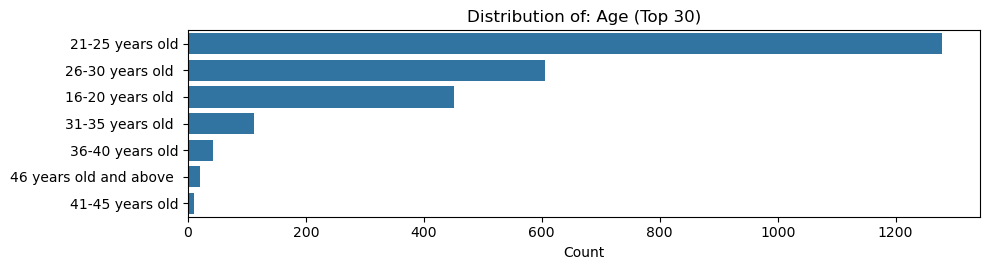

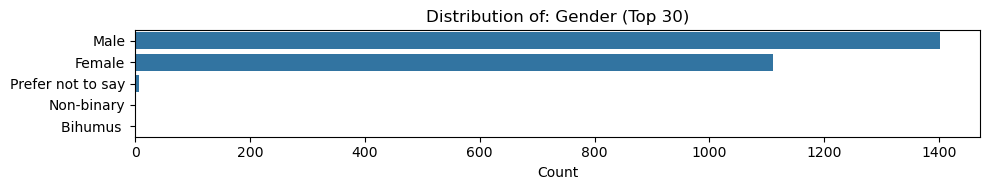

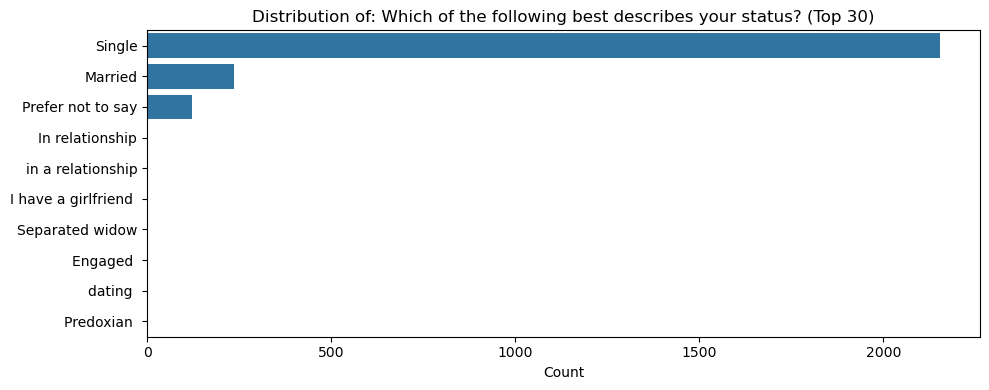

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


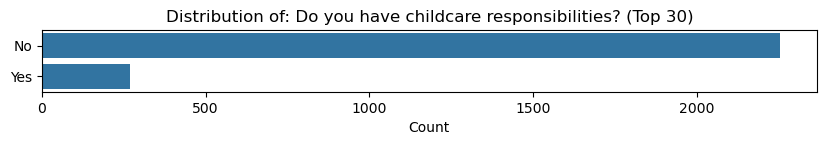

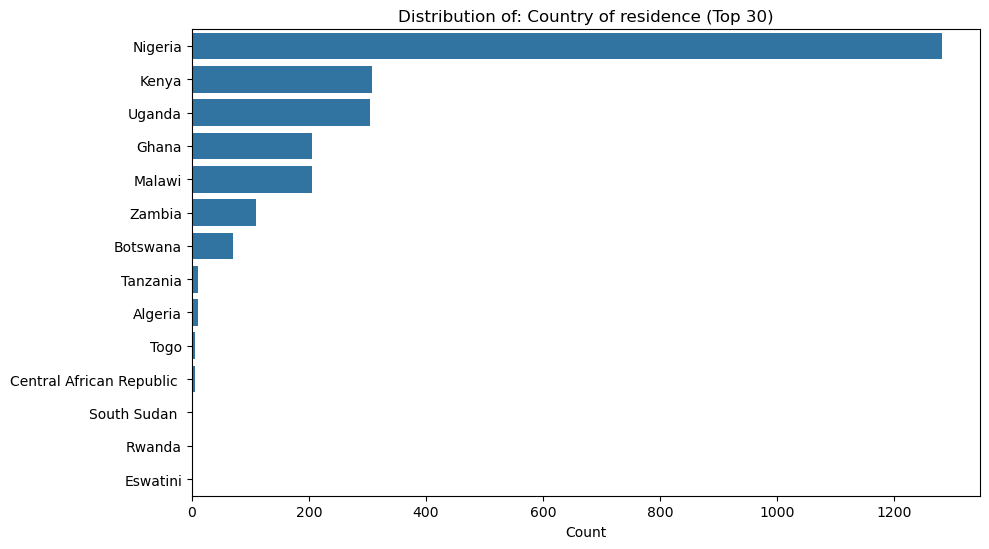

Skipping 'City of residence' — too many unique values (362)


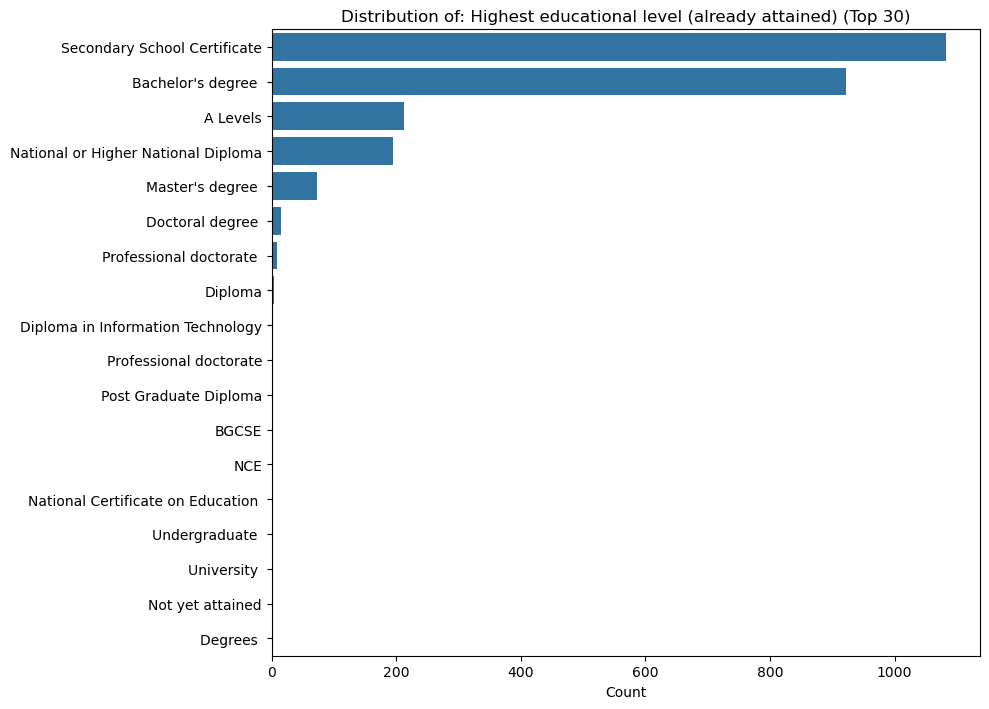

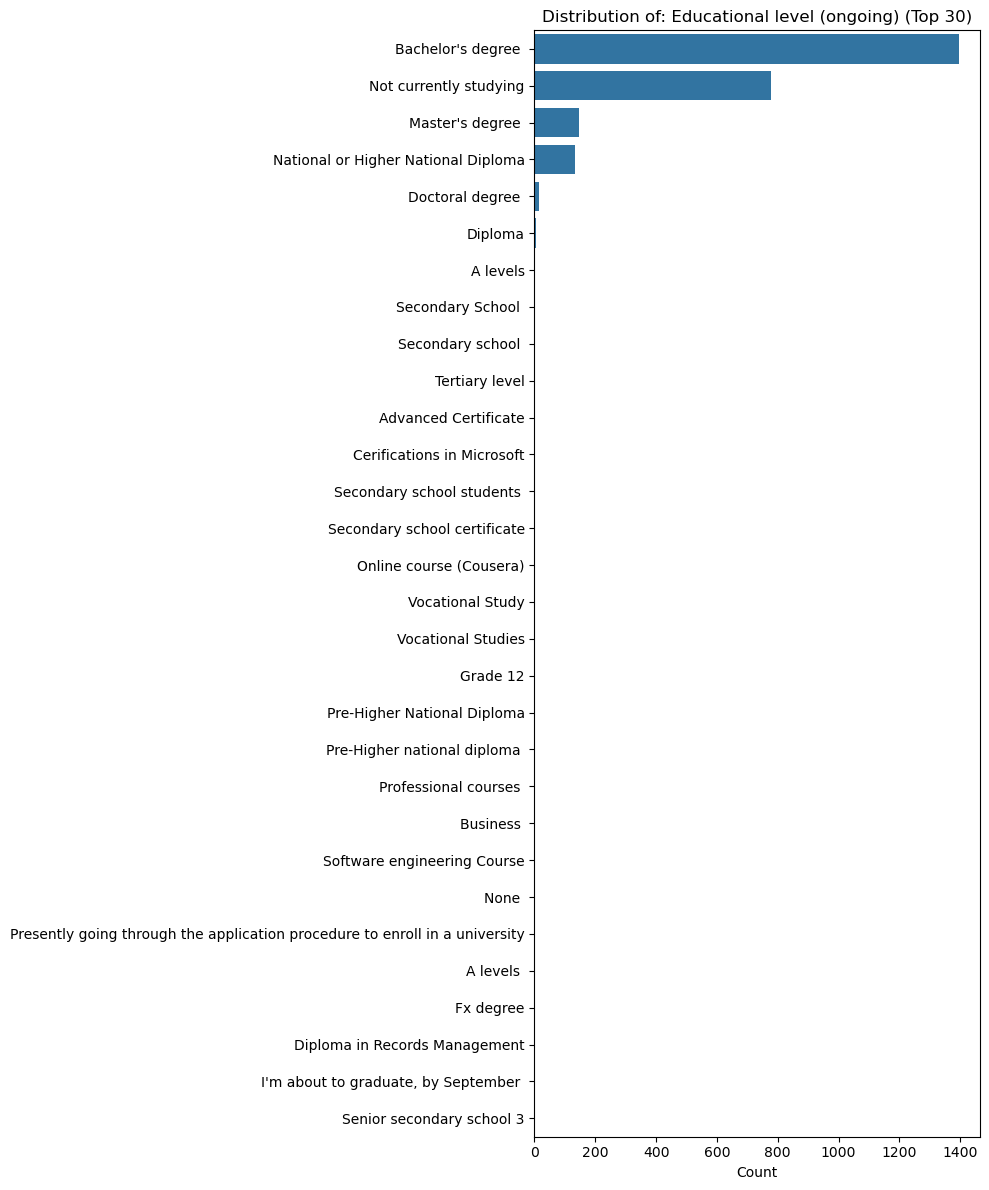

Skipping 'Field of study' — too many unique values (111)


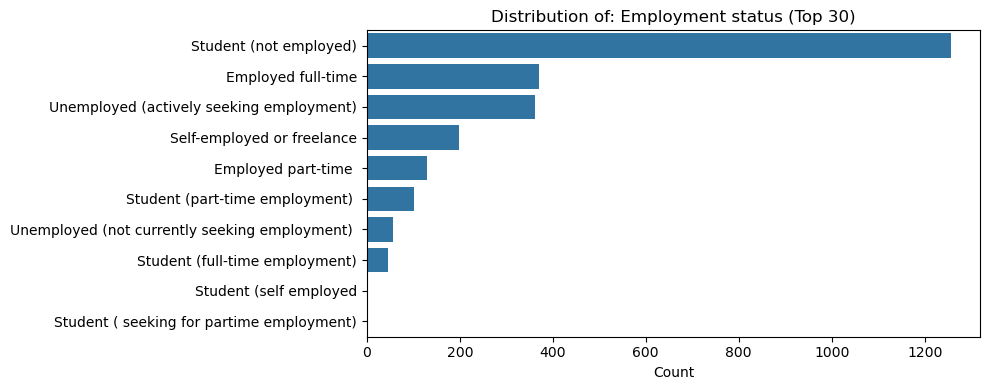

Skipping 'If employed part or full-time, what is your job description?' — too many unique values (672)


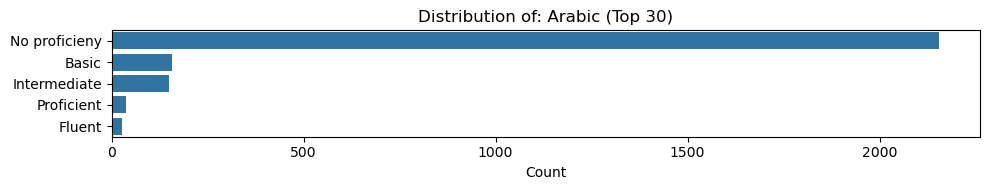

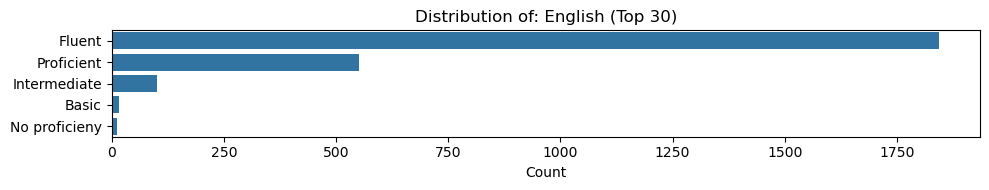

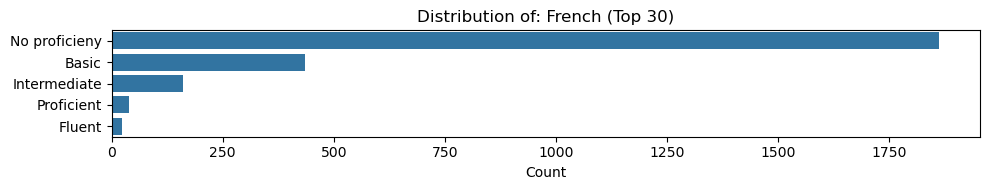

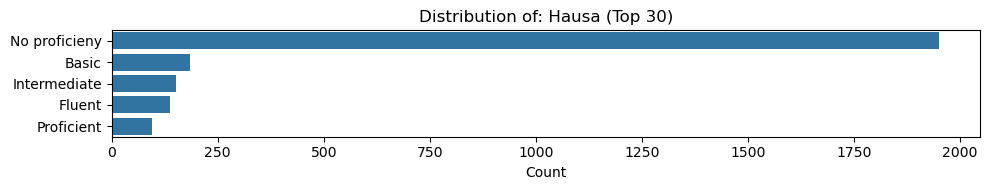

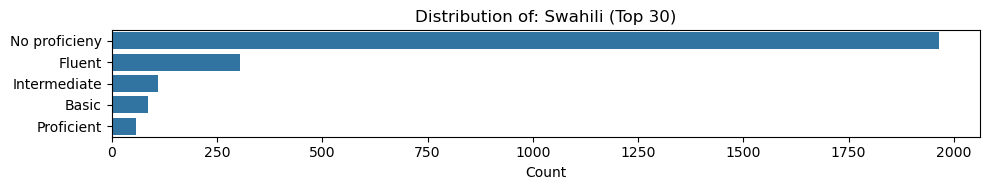

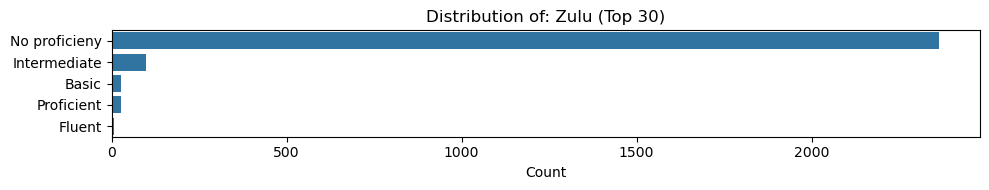

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


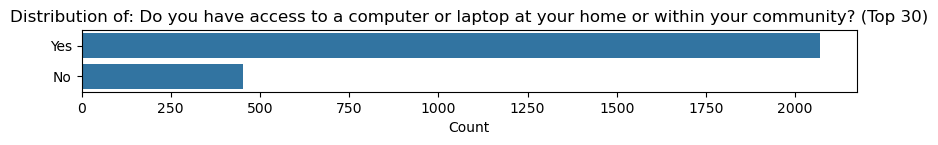

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


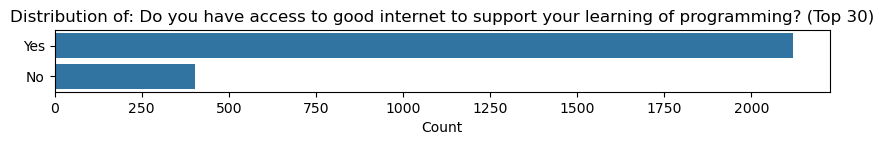

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


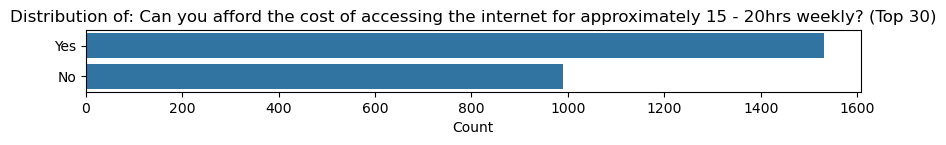

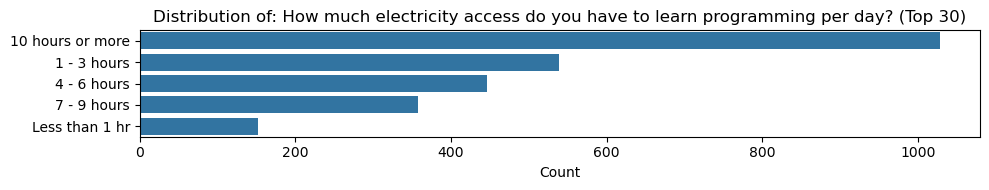

Skipping 'Have you ever received training in computer programming?' — too many unique values (178)
Skipping 'What source of income have you used to support your previous exposure to programming?' — too many unique values (232)


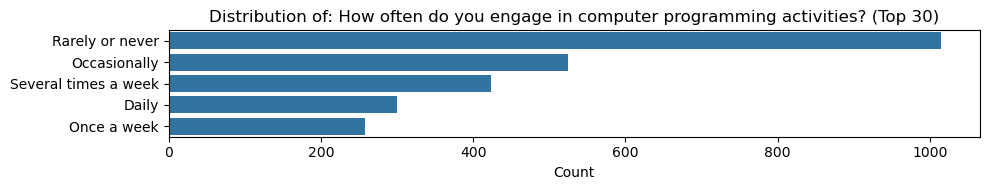

Skipping 'What is the major factor limiting your engagement?' — too many unique values (1125)
Skipping 'Which of the following factors most strongly motivates you to learn computer programming?' — too many unique values (151)
Skipping 'Which programming languages are you most interested in learning?' — too many unique values (479)
Skipping 'What is your motivation for selecting the programming language above?' — too many unique values (1386)


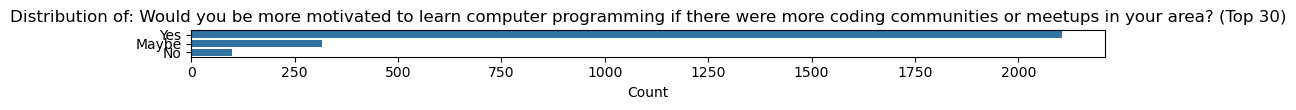

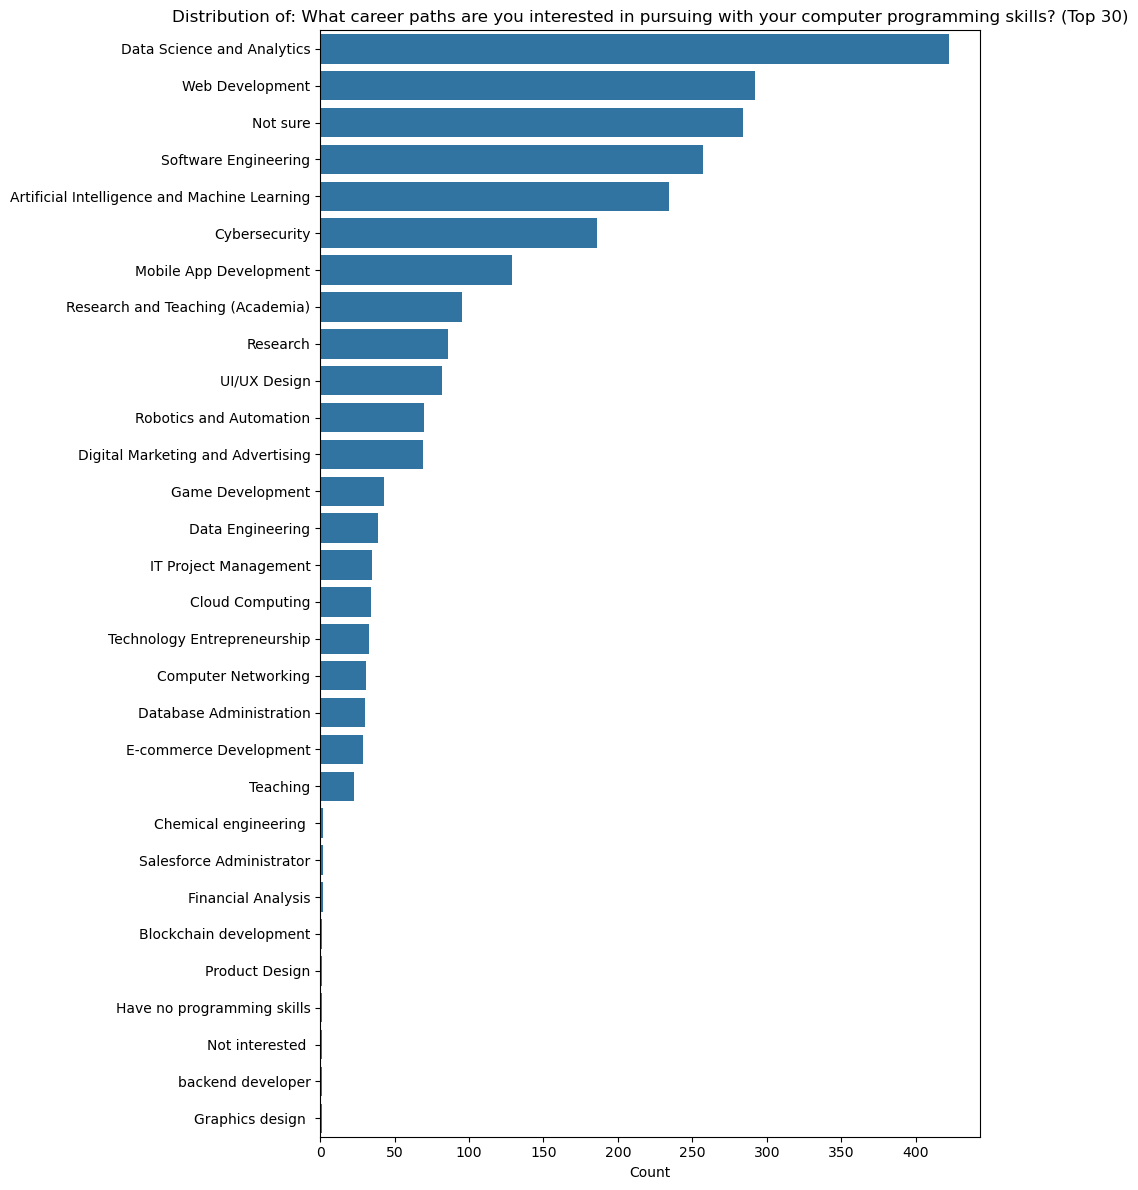

Skipping 'Which of the following challenges have you faced in learning or improving your computer programming skills?' — too many unique values (951)


C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


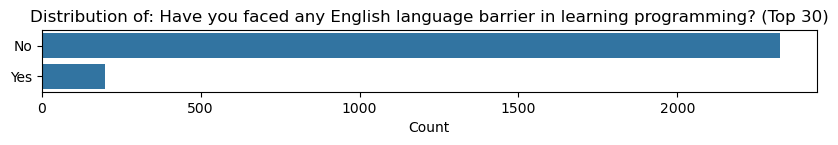

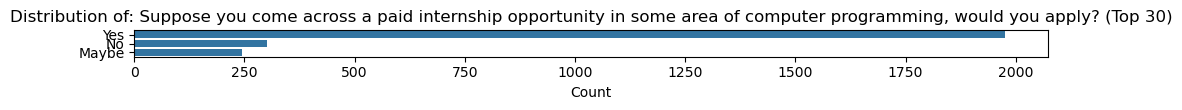

Skipping 'What type of learning resources do you find most helpful for learning computer programming? (Select all that apply)' — too many unique values (753)


C:\Users\grace\AppData\Local\Temp\ipykernel_8344\1184579900.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


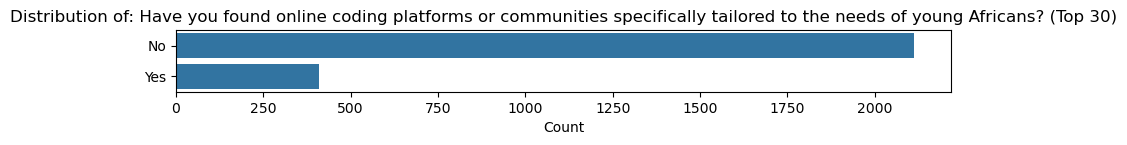

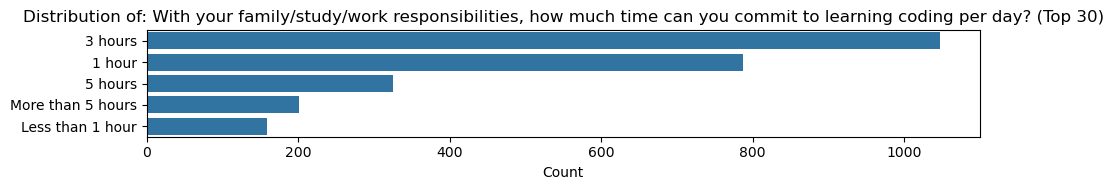

Skipping 'With your responsibilities, what type/structure of learning programming would work for you? (select all that apply)' — too many unique values (286)
Skipping 'What would you suggest to CSA Africa to help you advance on your programming journey?' — too many unique values (2025)
Skipping 'How would you describe your current perception of learning computer programming?' — too many unique values (60)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Clean column names: remove invisible characters and normalize spaces
df.columns = [re.sub(r'[\xa0\u200b\s]+', ' ', col).strip() for col in df.columns]

def plot_many_categoricals(dataframe, columns, top_n=20, max_unique=50):
    """
    Plots bar charts for multiple categorical variables.
    Skips variables with too many unique values (assumed to be free text).

    Args:
        dataframe (pd.DataFrame): Your data.
        columns (list): List of column names to plot.
        top_n (int): Max categories to display per plot.
        max_unique (int): Max allowed unique categories to plot.
    """
    for col in columns:
        num_unique = dataframe[col].nunique(dropna=True)

        # Skip columns with excessive cardinality
        if num_unique > max_unique:
            print(f"Skipping '{col}' — too many unique values ({num_unique})")
            continue

        top_vals = dataframe[col].value_counts().nlargest(top_n)

        plt.figure(figsize=(10, 0.4 * len(top_vals)))  # dynamic height
        sns.barplot(x=top_vals.values, y=top_vals.index, orient='h')
        plt.title(f"Distribution of: {col} (Top {top_n})")
        plt.xlabel("Count")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

# Apply to all categorical vars
plot_many_categoricals(df, categorical_vars, top_n=30, max_unique=50)


### Few insights

**General Overview**

* **Total responses**: 2,521 participants
* **Top country**: 🇳🇬 **Nigeria** (most represented)
* **Top age group**: **21–25 years old**
* **Top gender**: **Male**
* **Top education level attained**: **Secondary School Certificate**
* **Top current status**: **Student (not employed)**

### Access to Learning Resources

| Resource                      | % with Access |
| ----------------------------- | ------------- |
| **Laptop or computer**        | 82.1%         |
| **Good internet**             | 84.1%         |
| **Can afford internet**       | 60.7%         |
| **10+ hours electricity/day** | 40.8%         |

> **Interpretation**:

* Infrastructure **access is relatively high**, but **affordability and electricity availability** present barriers for many.
* Roughly **2 in 5 learners** lack consistent electricity — a key barrier for programming practice.

---

### Education & Motivation Insights

* The majority of learners are **at or below undergraduate level**.
* **Ongoing education** is dominated by bachelor’s degree students, but with many variations.
* High aspirations in **Data Science**, **AI**, **Web & Software Development**, seen in the career path interest chart.
* Language proficiency varies:

  * High **multilingualism**.
  * Most learners report **low-to-moderate** proficiency in **non-English African languages**.
---

### Skipped Variables

Several fields were skipped in plots because they have:

* Too many unique values (e.g., job descriptions, learning resource suggestions),
* Free-text responses (e.g., motivations, programming languages).

These are better analyzed using:

* **Text preprocessing + clustering or topic modeling**
* Or **qualitative grouping** (e.g., grouping job descriptions into categories)

---


## Step 8: Ordinal Variable Visualisation

Ordinal variables are those with ranked responses, such as Likert scale items ("Strongly agree" to "Strongly disagree") or levels of interest and confidence.

In this step, I:
- Plot distributions of ordinal variables.
- Respect their ordering (e.g., 'Strongly disagree' < 'Disagree' < 'Neutral' < 'Agree' < 'Strongly agree').
- Explore how learners perceive programming, rate their confidence, and view barriers.

This helps us understand:
- General attitudes toward programming
- Perceived levels of competence and support



C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


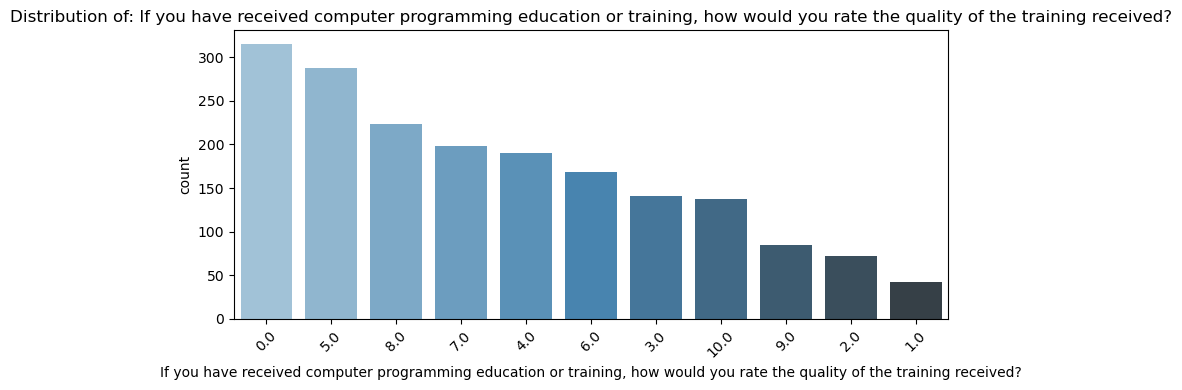

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


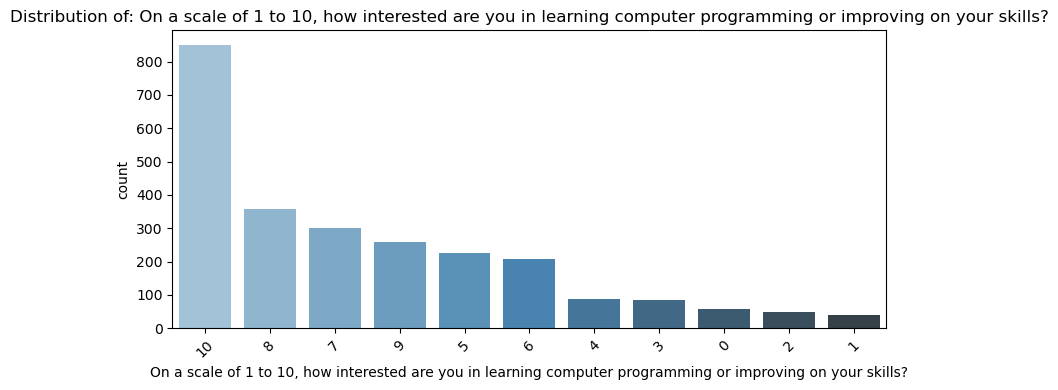

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


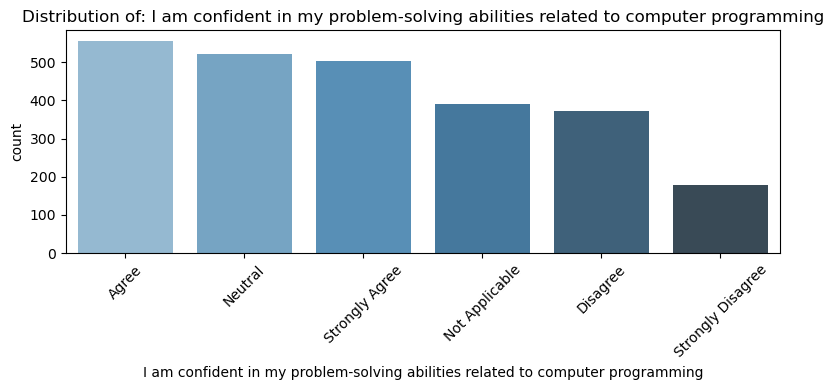

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')
C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


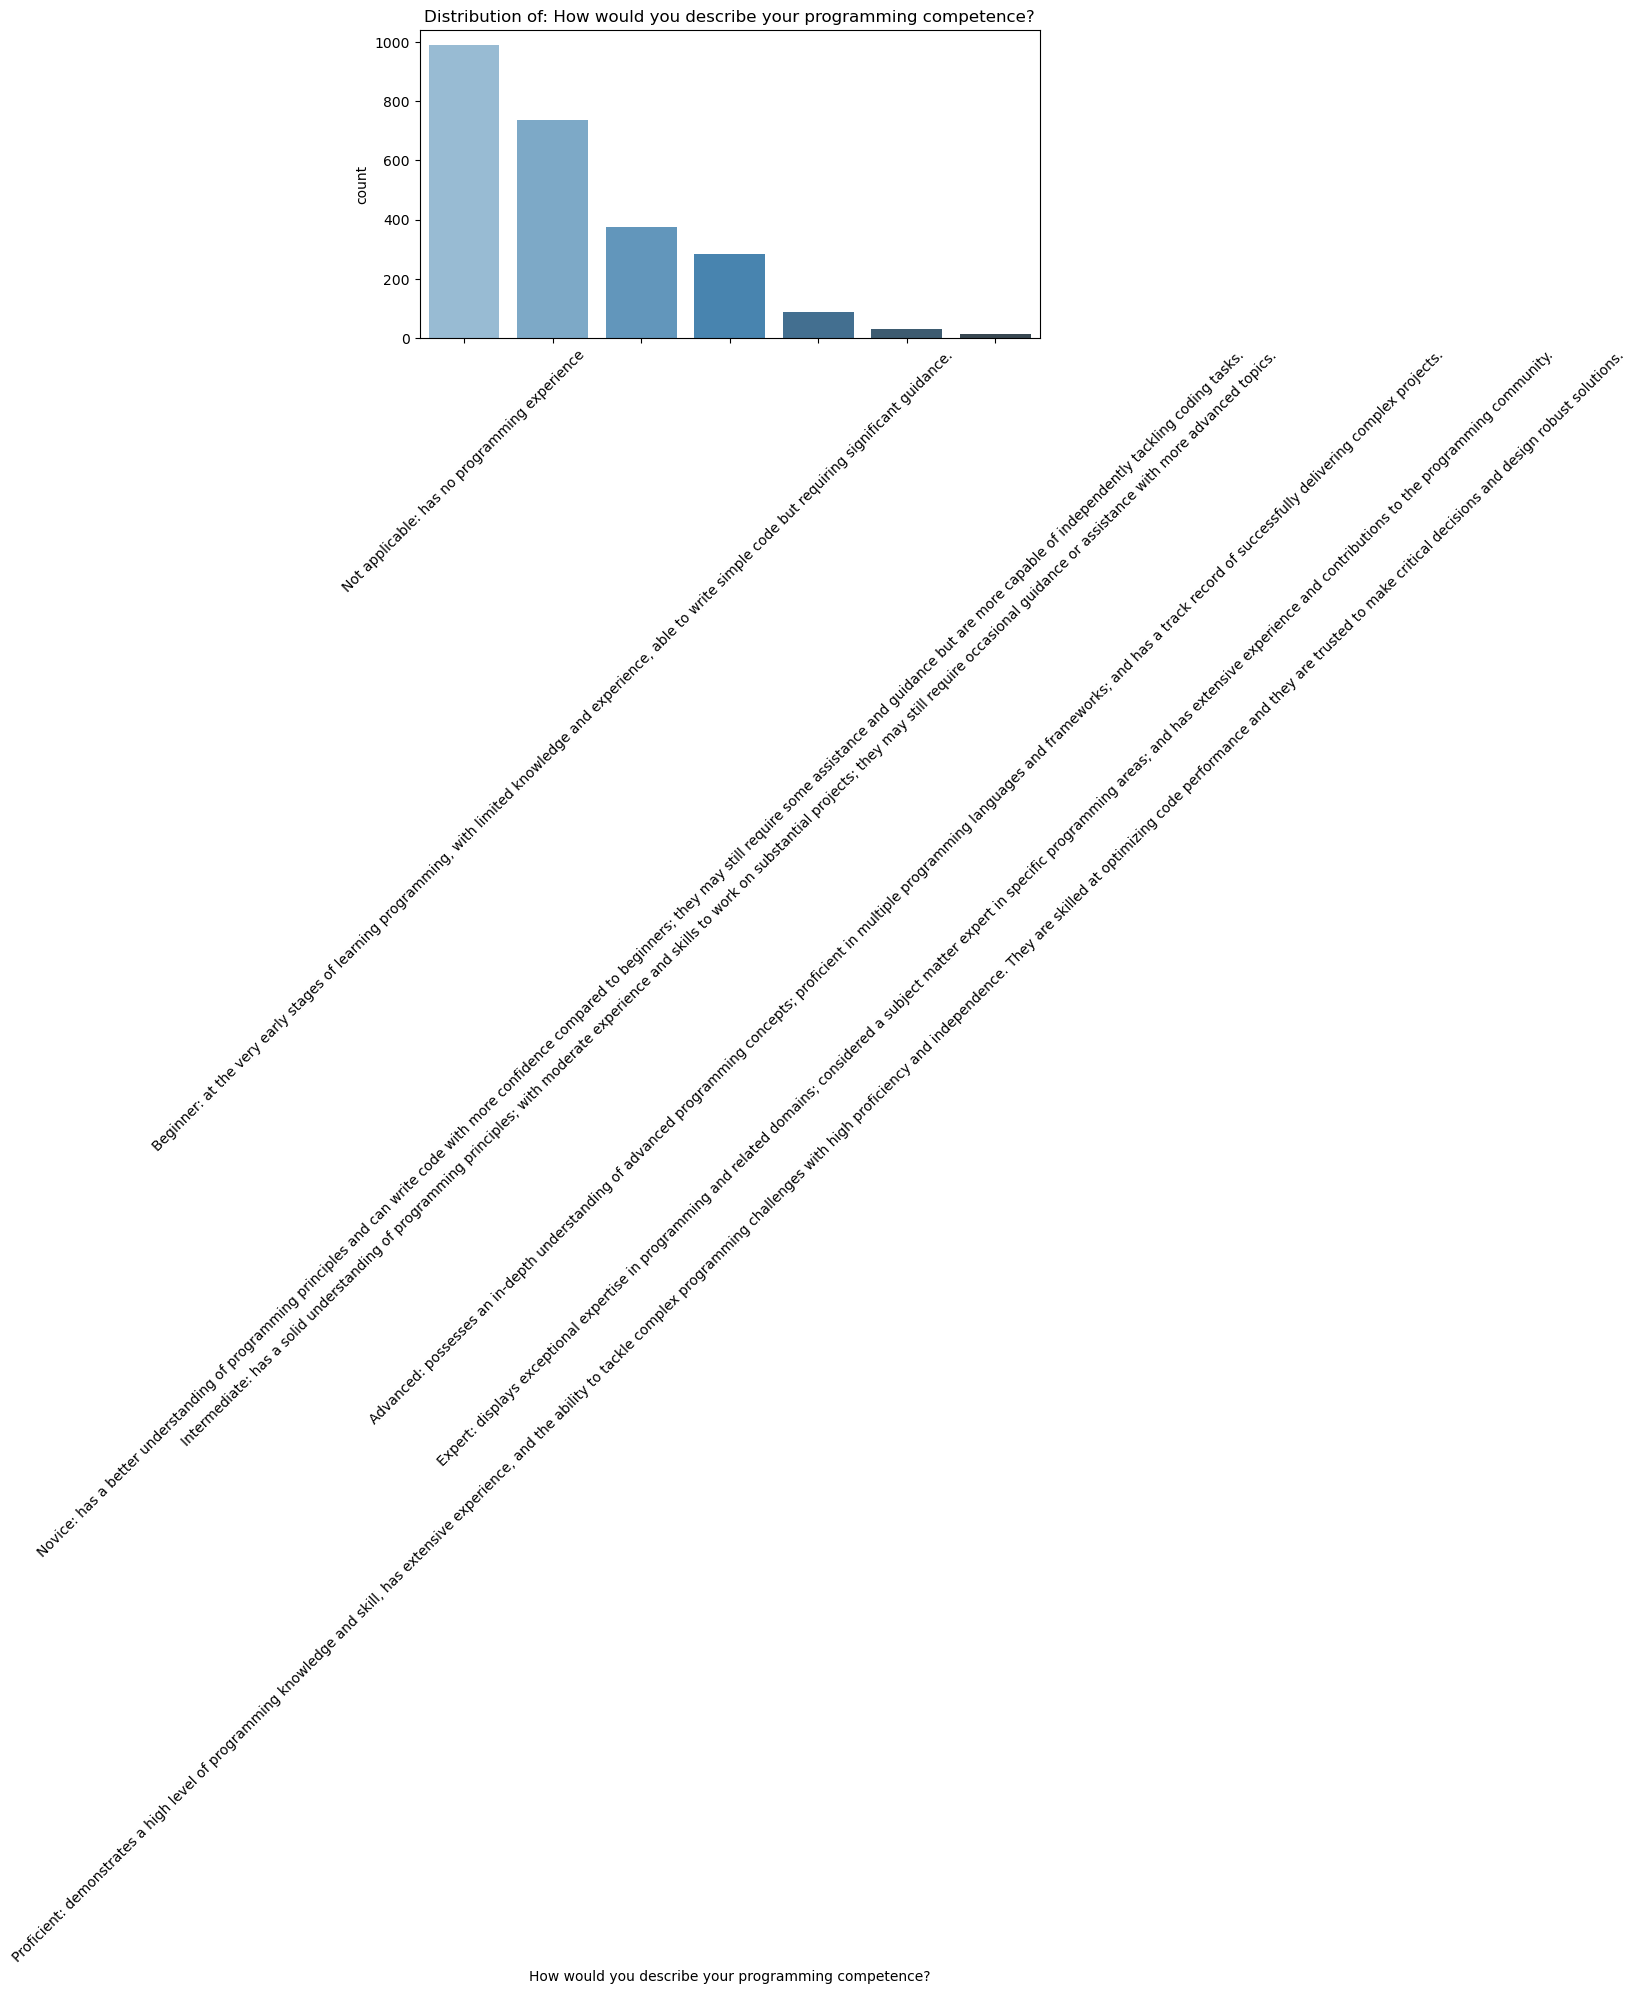

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


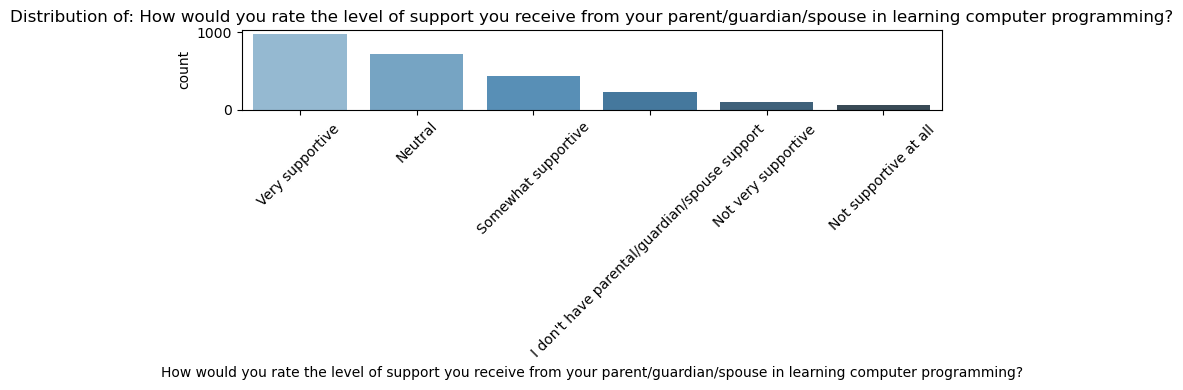

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


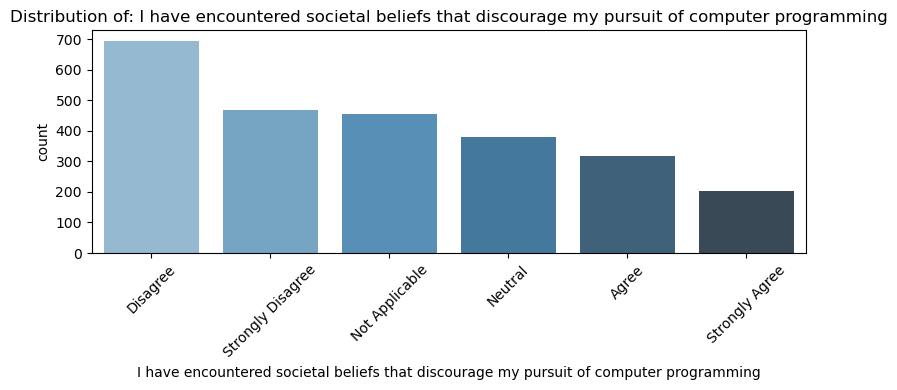

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


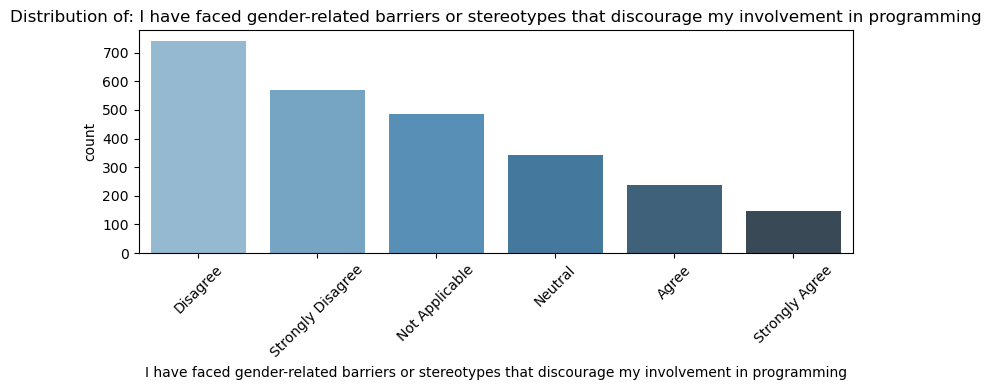

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


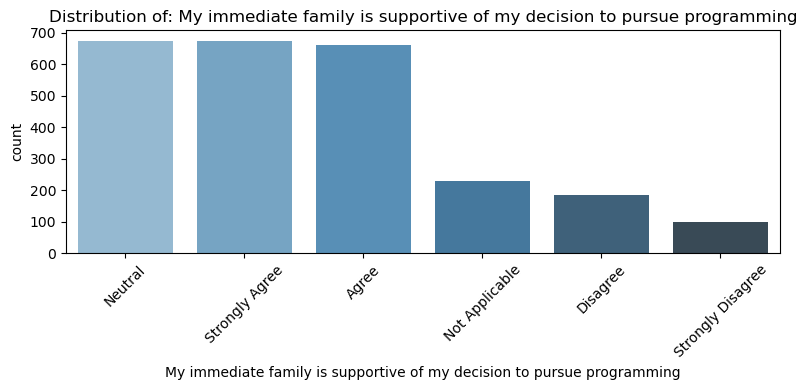

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


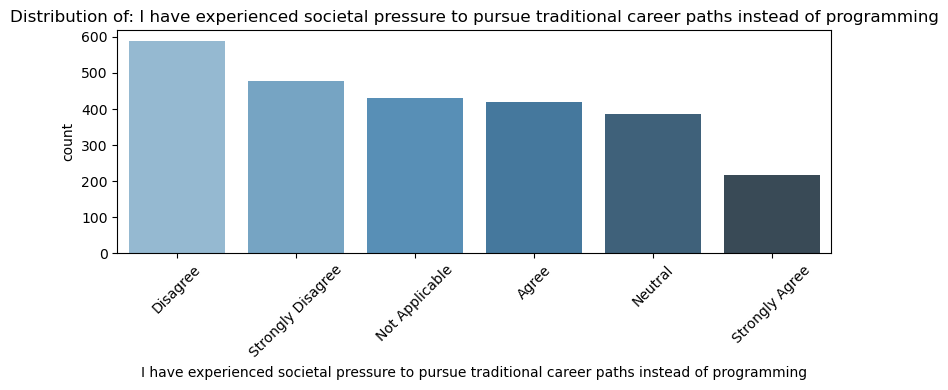

Skipping 'There are societal expectations  within my community that prioritises other subjects of study over programming' — not found in DataFrame.


C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


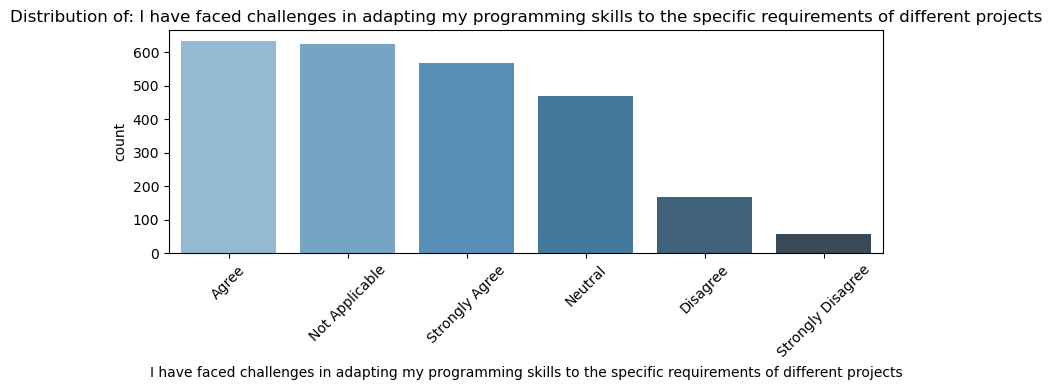

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


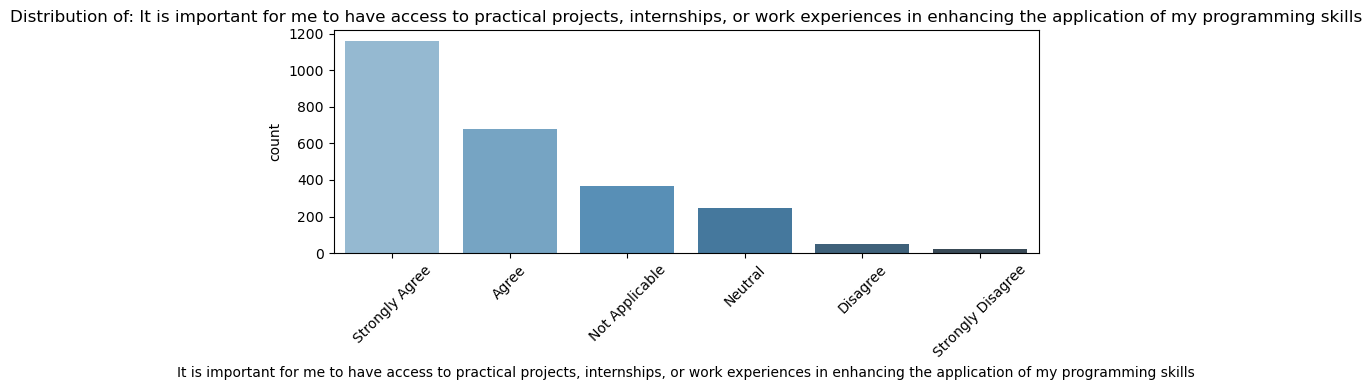

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


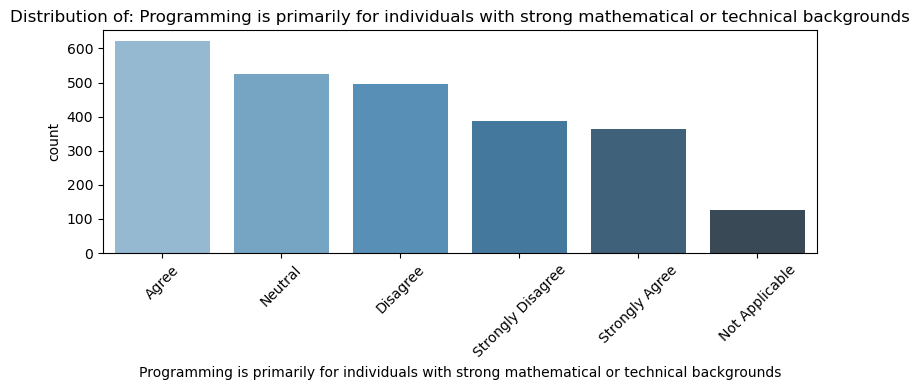

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


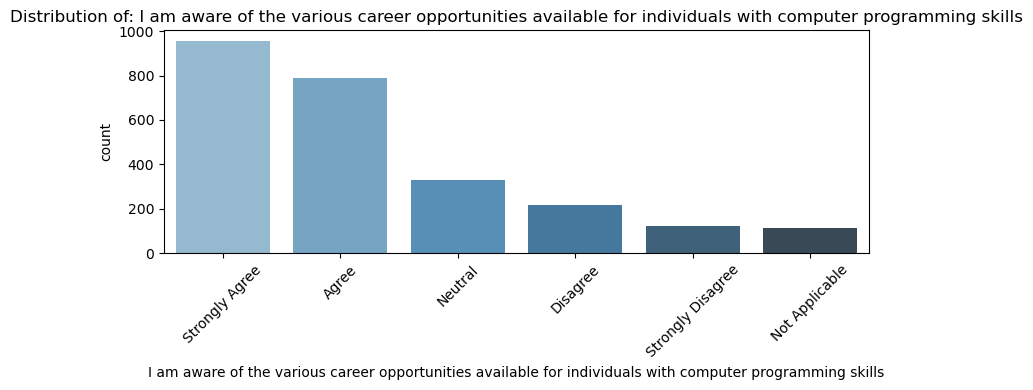

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


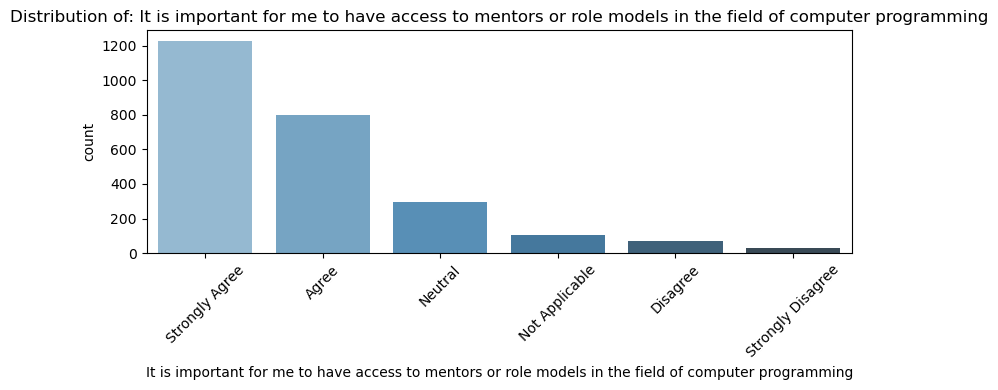

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


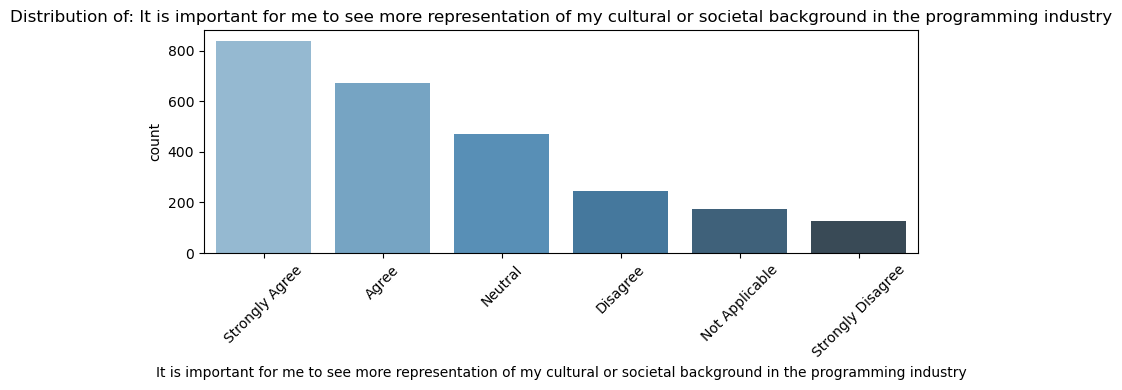

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


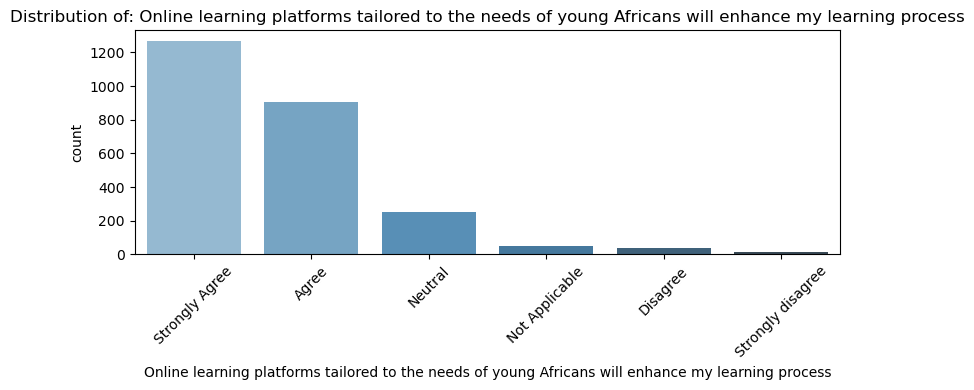

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


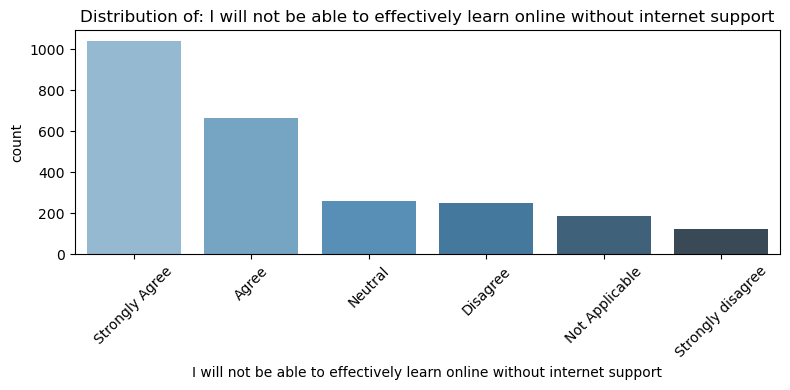

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


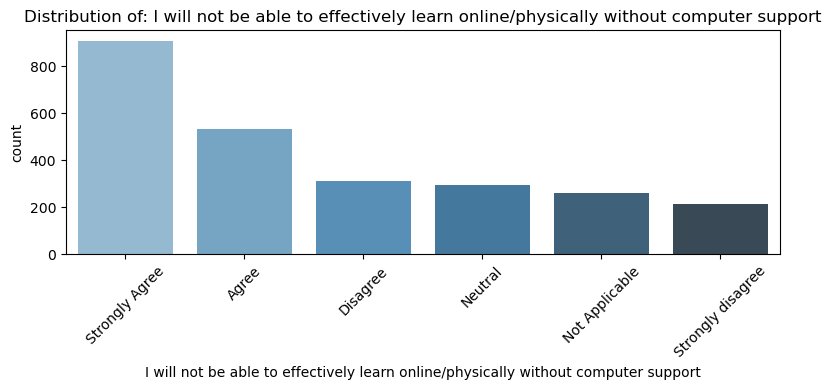

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


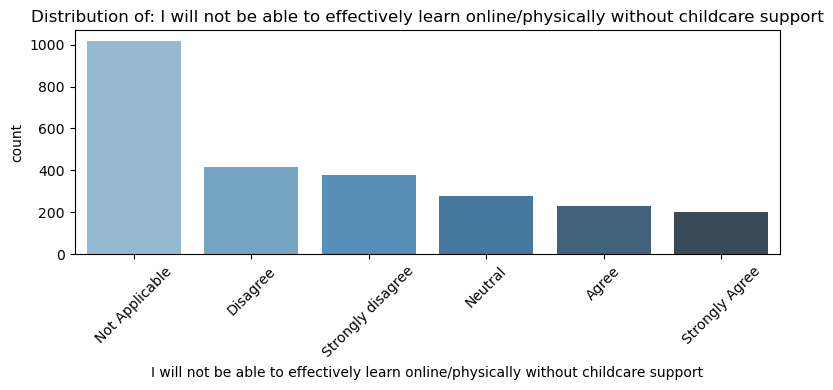

Skipping 'I will not be able to effectively learn online without electricity support' — not found in DataFrame.


C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


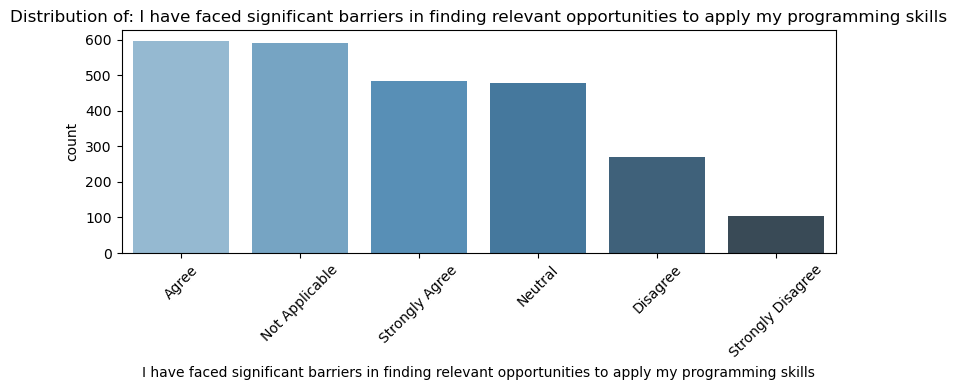

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


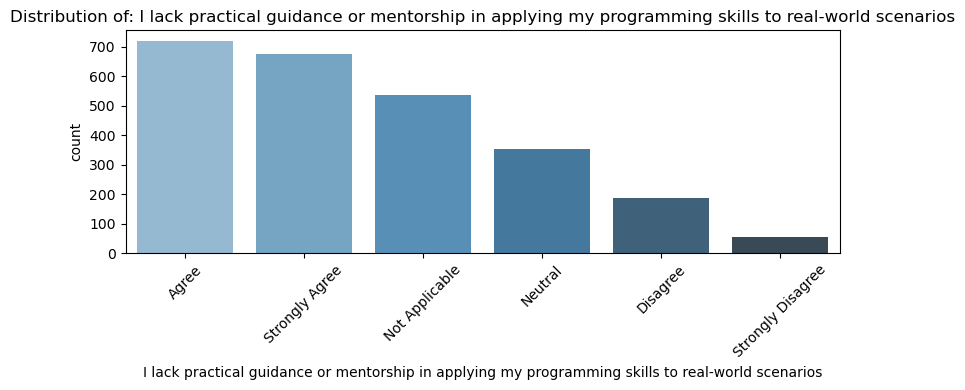

C:\Users\grace\AppData\Local\Temp\ipykernel_8344\161091504.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Blues_d')


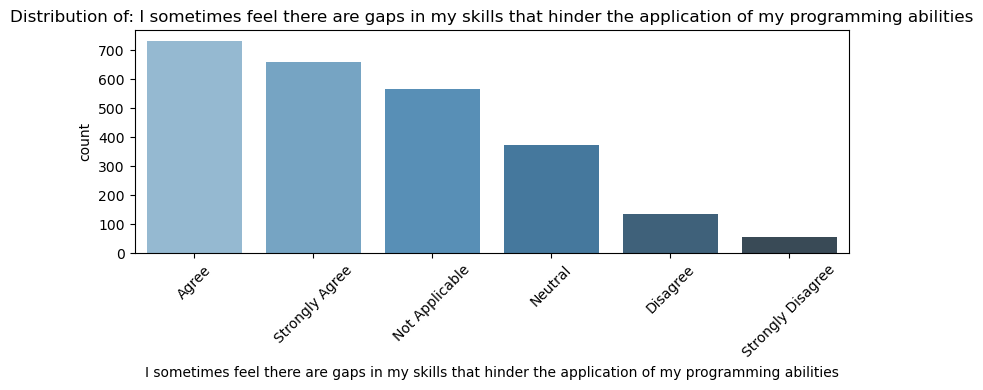

In [ ]:
# Define expected common ordinal scales
LIKERT_5 = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']
LIKERT_4 = ['Disagree', 'Somewhat agree', 'Agree', 'Strongly agree']
PROFICIENCY_ORDER = ['No proficiency', 'Basic', 'Intermediate', 'Proficient', 'Fluent']
INTEREST_SCALE = list(map(str, range(1, 11)))  # 1 to 10 rating

# Smart order selector
def get_ordinal_order(col_values):
    unique = set(col_values.dropna().unique())
    if set(LIKERT_5).issubset(unique): return LIKERT_5
    if set(LIKERT_4).issubset(unique): return LIKERT_4
    if set(PROFICIENCY_ORDER).issubset(unique): return PROFICIENCY_ORDER
    # if set(BINARY_ORDER).issubset(unique): return BINARY_ORDER
    if unique.issubset(set(INTEREST_SCALE)): return INTEREST_SCALE
    return None  # No known order found

# Plot all ordinal vars
def plot_all_ordinal(df, ordinal_list, max_unique=15):
    for col in ordinal_list:
        if col not in df.columns:
            print(f"Skipping '{col}' — not found in DataFrame.")
            continue

        unique_count = df[col].nunique(dropna=True)
        if unique_count > max_unique:
            print(f"Skipping '{col}' — too many unique values ({unique_count})")
            continue

        order = get_ordinal_order(df[col])
        if order is None:
            # fallback: order by frequency
            order = df[col].value_counts().index.tolist()

        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=order, palette='Blues_d')
        plt.title(f'Distribution of: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_all_ordinal(df, ordinal_vars)


## Step 9: Univariate Analysis of Numerical Variables

In this step,  visualize numerical variables using:
- **Histograms** to understand the distribution shape
- **Boxplots** to detect outliers or skewness

These help assess data quality, variability, and if transformations are needed in later modeling.


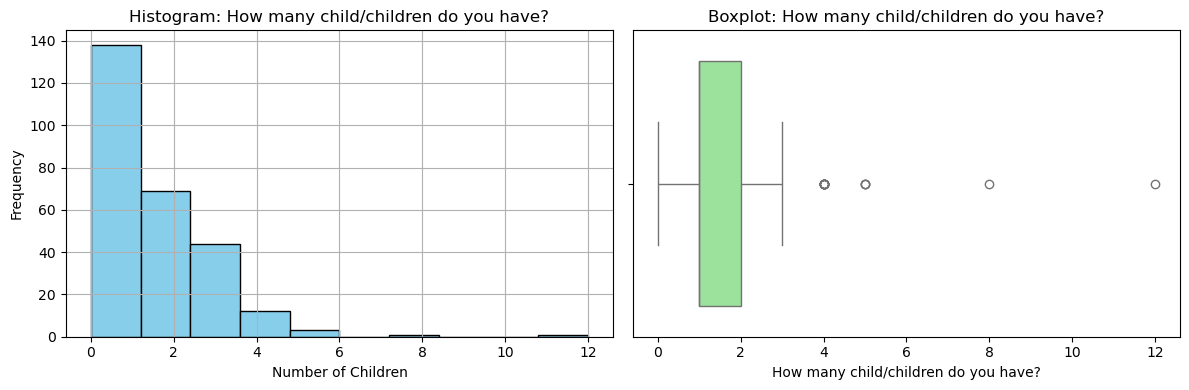

In [ ]:
# Plot histogram and boxplot for the numeric variable
numeric_var = 'How many child/children do you have?'

plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
df[numeric_var].dropna().hist(bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram: {numeric_var}')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[numeric_var], color='lightgreen')
plt.title(f'Boxplot: {numeric_var}')

plt.tight_layout()
plt.show()


### Step 10: Word Clouds from Free-Text Responses

We use word clouds to visualize the most frequent words in open-ended questions.
This helps:
- Highlight recurring themes
- Surface learner concerns or priorities
- Guide further qualitative analysis


In [ ]:
!pip install wordcloud

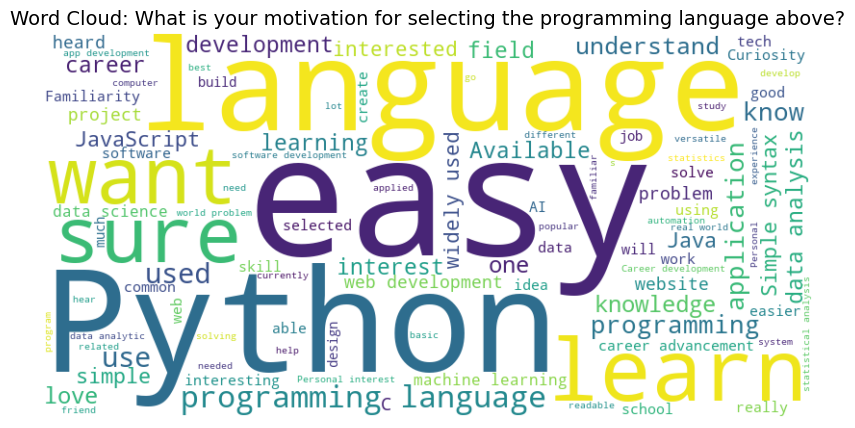

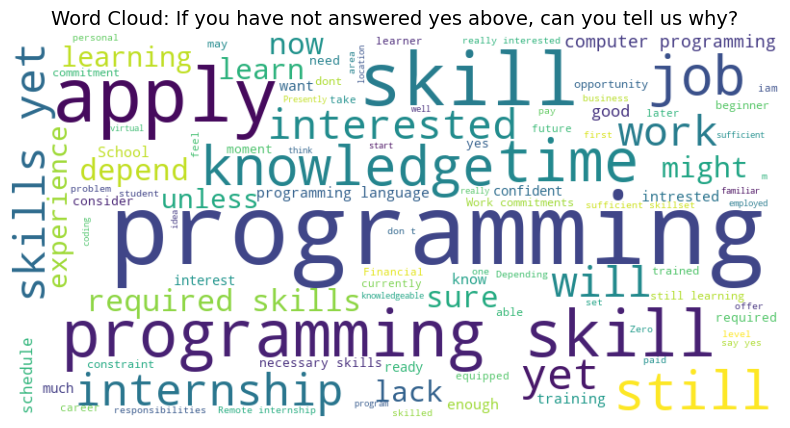

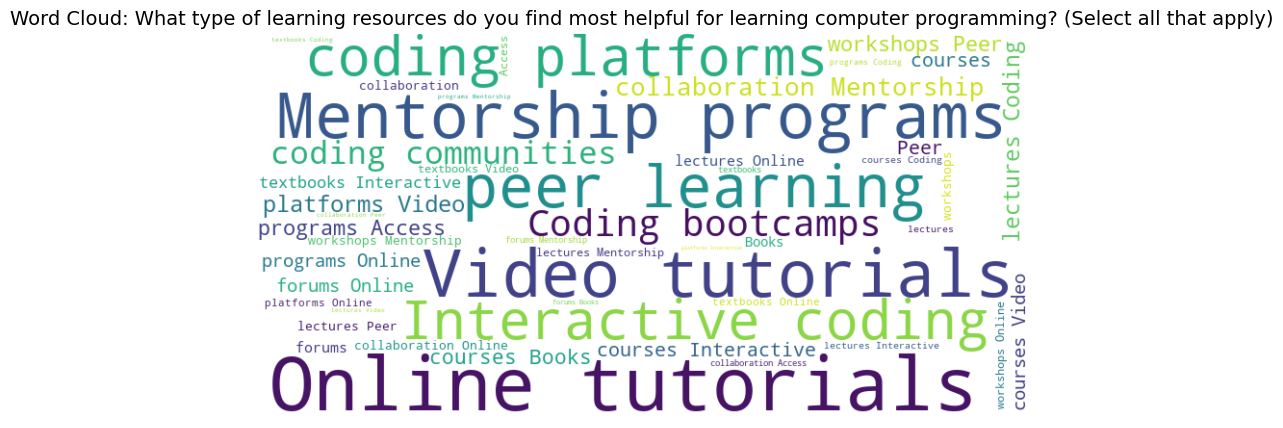

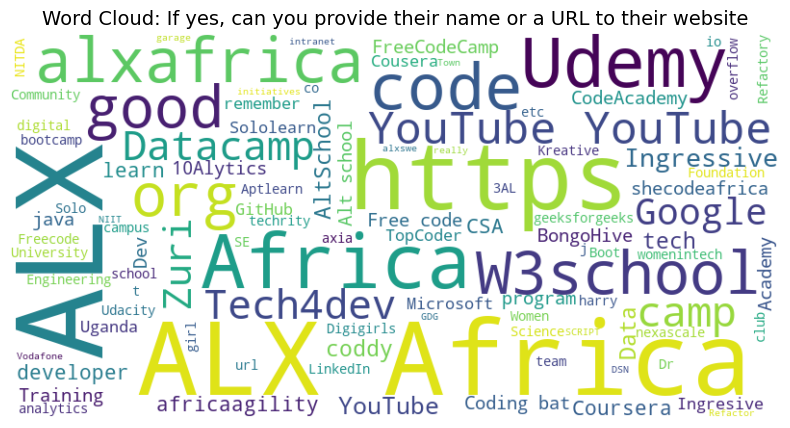

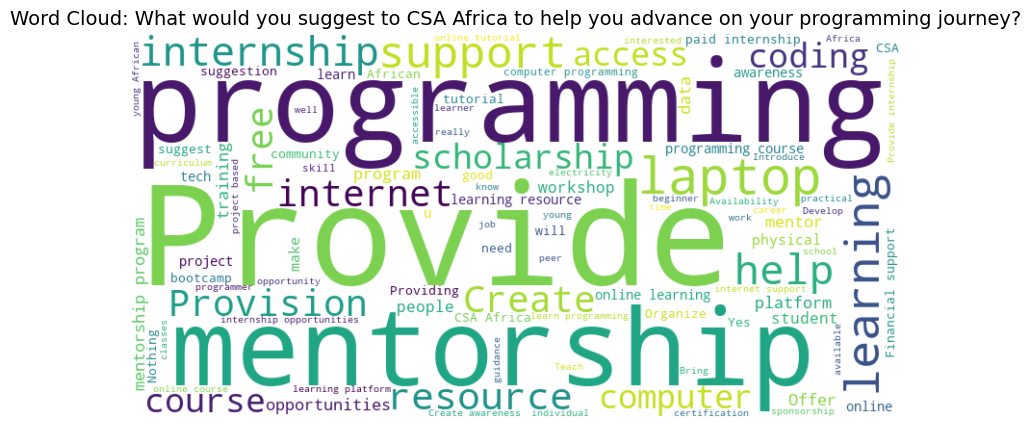

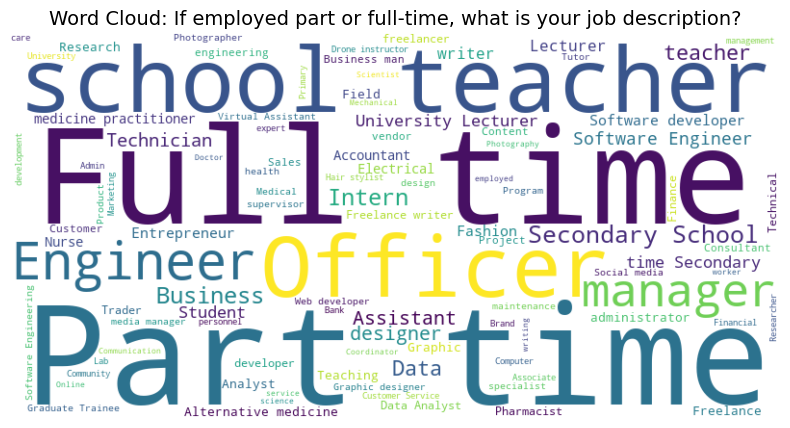

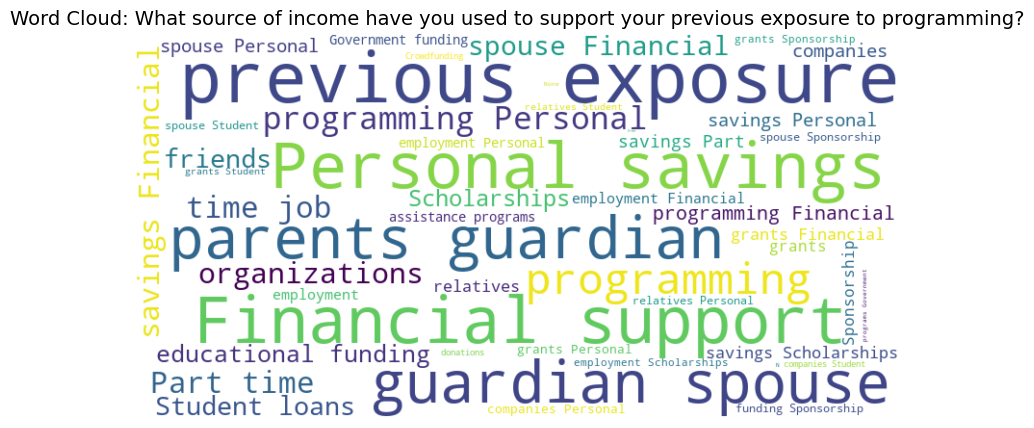

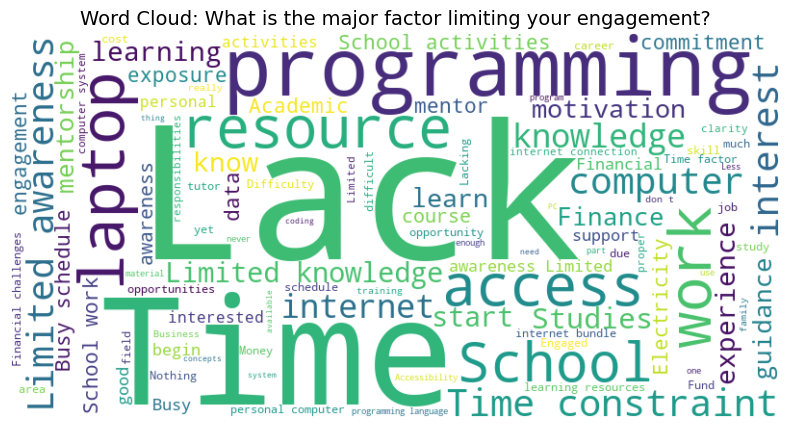

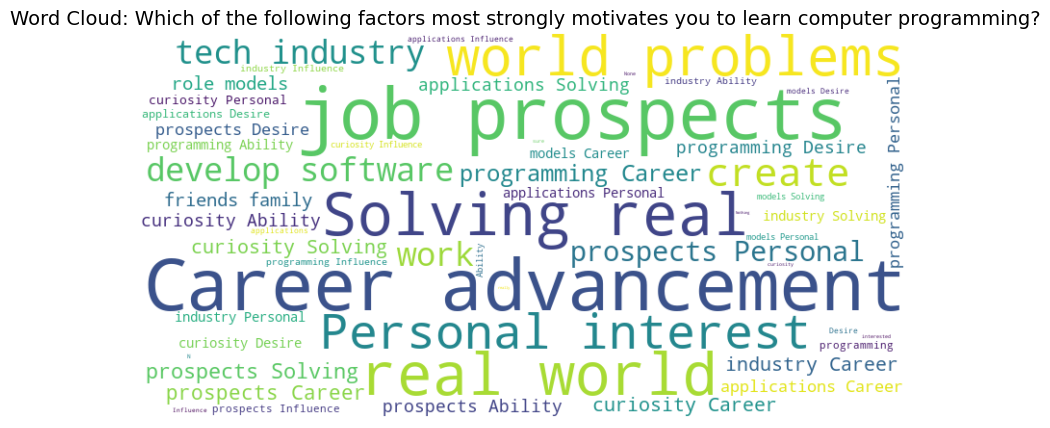

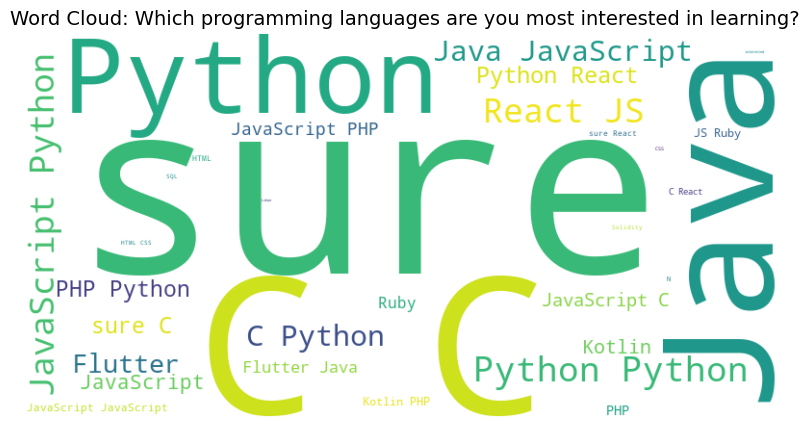

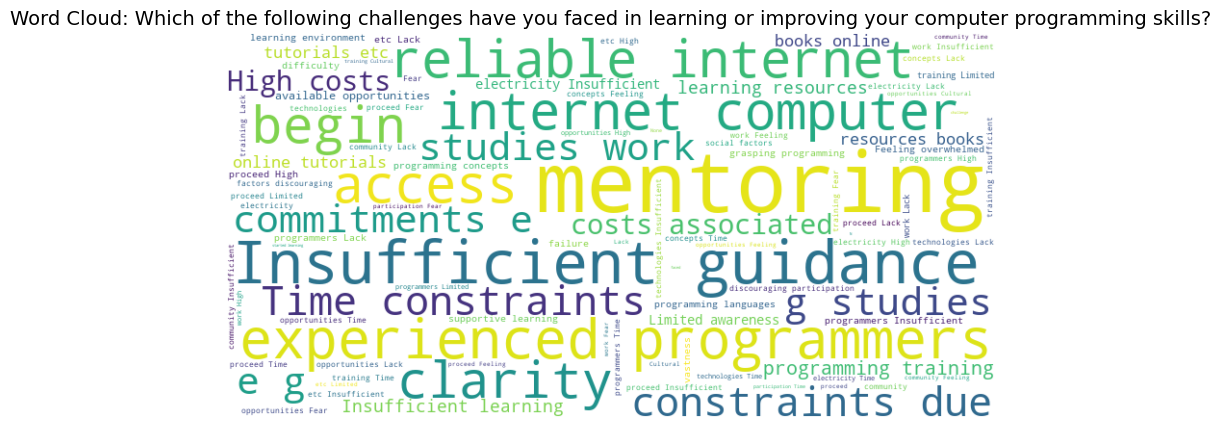

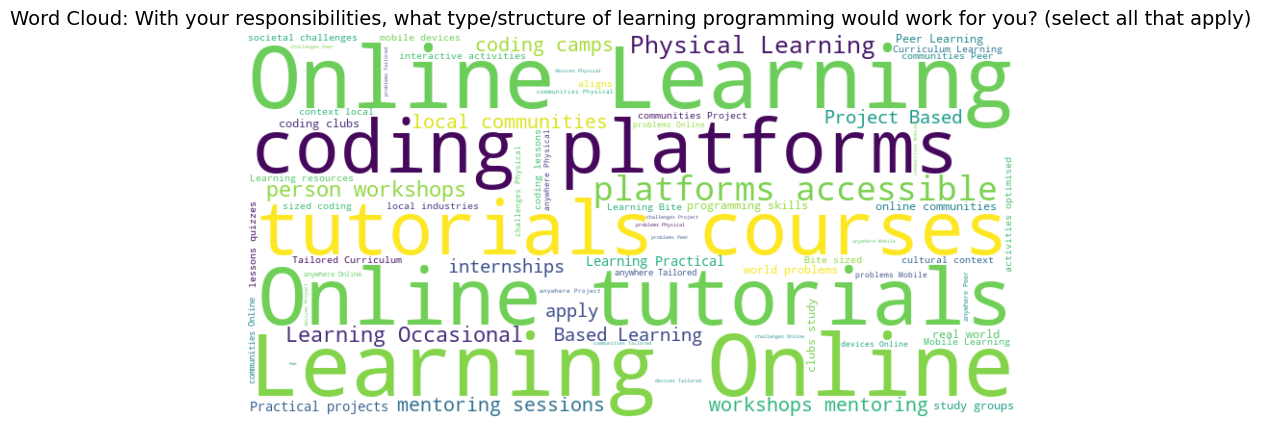

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

free_text_vars = [
    'What is your motivation for selecting the programming language above?',
    'If you have not answered yes above, can you tell us why?',
    'What type of learning resources do you find most helpful for learning computer programming? (Select all that apply)',
    'If yes, can you provide their name or a URL to their website',
    'What would you suggest to CSA Africa to help you advance on your programming journey?',
    'If employed part or full-time, what is your job description?',
    'What source of income have you used to support your previous exposure to programming?',
    'What is the major factor limiting your engagement?',
    'Which of the following factors most strongly motivates you to learn computer programming?',
    'Which programming languages are you most interested in learning?',
    'Which of the following challenges have you faced in learning or improving your computer programming skills?',
    'With your responsibilities, what type/structure of learning programming would work for you? (select all that apply)'
]


def plot_wordcloud(text_series, title, max_words=100):
    text = ' '.join(text_series.dropna().astype(str))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=max_words).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Loop through each free text column and plot wordcloud
for col in free_text_vars:
    if col in df.columns:
        plot_wordcloud(df[col], f'Word Cloud: {col}')
    else:
        print(f"Column not found: {col}")


## Exploratory Data Analysis (EDA) Summary

### 1. Dataset Profile
- **Size**: 2,521 responses
- **Columns**: 75 total variables
- **Scope**: Covers demographics, infrastructure access, psychological and motivational variables, learning experiences, and open-ended feedback.

---

### 2. Data Types Overview
| Type            | Count | Description |
|------------------|-------|-------------|
| Categorical      | 40   | Gender, country, status, language ability, access indicators, etc. |
| Ordinal (Likert) | 20   | Agreement/perception ratings on support, confidence, barriers, etc. |
| Numerical        | 1     | Number of children |
| Free-text        | 5+    | Motivations, job roles, CSA suggestions, resources |
| DateTime         | 2     | Survey start and completion times (mostly unused) |

---

### 3. Key Univariate Insights

#### Categorical Distributions
- **Age**: Skewed towards 18–25-year-olds
- **Gender**: More males, but substantial female representation
- **Country**: Mostly Nigeria and Kenya
- **Status**: Majority are students or unemployed

#### Infrastructure Access
- **Computer access**: High (80%)
- **Internet access**: Moderate to high (~84%), but **affordability** is a concern (60%)
- **Electricity**: Significant challenge — many have <10 hrs/day of reliable power

---

### 4. Word Cloud Findings (Free-Text Analysis)
- **Motivations**: “career”, “future”, “AI”, “tech”, “skills”, “job”, “interest”
- **CSA Suggestions**: “mentorship”, “bootcamps”, “access”, “projects”, “resources”
- **Resources Used**: “YouTube”, “books”, “tutorials”, “freecodecamp”, “Stack Overflow”

---

### 5. Ordinal Variables (Attitudes, Confidence, Perceptions)
- High interest in programming (typically 7–10 out of 10)
- Confidence and mindset vary — some feel unprepared or isolated
- Barriers include lack of mentorship, societal pressure, and infrastructure limitations

---

### 6. Missing Data Observations
- Missing values often result from **logical skips** in branching survey logic
- Free-text fields contain **noise** and inconsistent phrasing
- Some categorical values might benefit from **reclassification or merging**

---

###  Overall Insights
- The dataset reveals a clear **skills gap** in digital and computing fields.
- Evidence of **barriers** spans infrastructure, mindset, affordability, and societal expectations.
- This data can be used to do in depth clustering, predictive modeling, or needs profiling.
- Solid foundation for a rigorous MSc-level data science dissertation with both **technical depth** and **social relevance**.
